In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sys

In [4]:
#########################################
# part (a)
#########################################

def normalize(a):
    return (a-a.mean(axis=0))/a.std()

def mu(X,Y):
    X1, X2 = X[Y==0],X[Y!=0]
    return np.array([X1.mean(axis=0),X2.mean(axis=0)])

def S(X,Y):
    X1, X2 = X[Y==0],X[Y!=0]
    m1, m2 = mu(X,Y)
    return ((X1-m1).T@(X1-m1) + (X2-m2).T@(X2-m2))/len(Y)

In [5]:
#########################################
# part (b)
#########################################

def plot_data(X,Y,save_file_name=None):
    X_x, X_y = X.T
    s = plt.scatter(X_x,X_y,c=Y,cmap=ListedColormap(['red','green']))
    
    plt.title('Scatter plot of Datapoints')
    plt.xlabel('x_0 (normalized)')
    plt.ylabel('x_1 (normalized)')
    labels = ['Alaska','Canada']
    plt.legend(handles=s.legend_elements()[0], labels=labels)
    
    if save_file_name:
        plt.savefig(save_file_name, dpi=150, bbox_inches='tight')

In [6]:
#########################################
# part (c)
#########################################

def plot_boundary(X,Y,mu,save_file_name=None):
    X_x, X_y = X.T
    s = plt.scatter(X_x,X_y,c=Y,cmap=ListedColormap(['red','green']))
    
    # getting separator: perp. bisector of mu's
    midpoint = (mu[0] + mu[1])/2
    diff = (mu[1]-mu[0])
    slope = -diff[1]/diff[0]
    print(midpoint,slope)
    
    plt.title('Scatter plot of Datapoints')
    plt.xlabel('x_0 (normalized)')
    plt.ylabel('x_1 (normalized)')
    plt.axline(midpoint, slope=slope, color='b')
    labels = ['Alaska','Canada']
    plt.legend(handles=s.legend_elements()[0], labels=labels)
    
    if save_file_name:
        plt.savefig(save_file_name, dpi=150, bbox_inches='tight')

In [7]:
#########################################
# part (d)
#########################################

def Si(X,Y):
    X1, X2 = X[Y==0],X[Y!=0]
    m1, m2 = mu(X,Y)
    return (((X1-m1).T@(X1-m1))/len(X1), ((X2-m2).T@(X2-m2))/len(X2))

In [8]:
#########################################
# part (e)
#########################################

def boundary_fn(mu,det_sigma,inv_sigma,X):

    return (X-mu[0]).T@inv_sigma[0]@(X-mu[0]) - (X-mu[1]).T@inv_sigma[1]@(X-mu[1]) \
         + np.log(det_sigma[0]) - np.log(det_sigma[1])

def plot_quadratic_boundary(X,Y,mu,sigma,save_file_name=None):
    X_x, X_y = X.T
    s = plt.scatter(X_x,X_y,c=Y,cmap=ListedColormap(['red','green']))
    
    # getting separator: P(c1) = P(c2). Solve.
    det_sigma = [np.linalg.det(sigma[0]), np.linalg.det(sigma[1])]
    inv_sigma = [np.linalg.inv(sigma[0]), np.linalg.inv(sigma[1])]
    
    x0_space = np.linspace(-0.5,0.5,401)
    x1_space = np.linspace(-1,1,801)
    x_meshgrid = np.stack(np.meshgrid(x0_space, x1_space),axis=2)
    
    vector_boundary_fn = np.vectorize(boundary_fn, signature="(2,2),(2),(2,2,2),(2)->()")
    boundary_2d = vector_boundary_fn(mu,det_sigma,inv_sigma,x_meshgrid)
    plot_pts = x_meshgrid[(boundary_2d<0.005)&(boundary_2d>-0.005)].T
    
    plt.plot(plot_pts[0], plot_pts[1], color='b')
    
    plt.title('Scatter plot of Datapoints')
    plt.xlabel('x_0 (normalized)')
    plt.ylabel('x_1 (normalized)')
    labels = ['Alaska','Canada']
    plt.legend(handles=s.legend_elements()[0], labels=labels)
    
    if save_file_name:
        plt.savefig(save_file_name, dpi=150, bbox_inches='tight')

In [15]:
class GaussianDiscriminantAnalyser:
    
    def __init__(self):
        self.mu = None
        self.sigma = None
        self.det_sigma = None
        self.inv_sigma = None
        self.bf = np.vectorize(boundary_fn, signature="(2,2),(2),(2,2,2),(2)->()")
    
    def fit(self,X,Y):
        self.mu = mu(X,Y)
        self.sigma = Si(X,Y)
        self.det_sigma = [np.linalg.det(self.sigma[0]), np.linalg.det(self.sigma[1])]
        self.inv_sigma = [np.linalg.inv(self.sigma[0]), np.linalg.inv(self.sigma[1])]
        
    def predict(self,X):
        Y = self.bf(self.mu, self.det_sigma, self.inv_sigma, X)
        return np.where(Y>0,'Canada', 'Alaska')

In [16]:
if __name__ == "__main__" and "__file__" in globals():
    if len(sys.argv) < 3:
        print("ERROR: this script requires a train and test directory. Exiting.")
    
    train_dir, test_dir = sys.argv[1],sys.argv[2]
    trainX = normalize(np.loadtxt(f"{train_dir}/X.csv", delimiter=','))
    trainY = np.loadtxt(f"{train_dir}/Y.csv", dtype=object)
    testX = normalize(np.loadtxt(f"{test_dir}/X.csv", delimiter=','))
    
    trainY_enc = np.where(trainY=='Alaska',0,1)

    model = GaussianDiscriminantAnalyser()
    model.fit(trainX,trainY_enc)
    preds = model.predict(testX)
    np.savetxt("result_4.txt",preds,fmt="%s")

In [7]:
# [StopConvert]

In [12]:
trainX = np.loadtxt('../data/q4/q4x.dat')
trainY = np.loadtxt('../data/q4/q4y.dat', dtype=object)
normX = normalize(trainX)

X = normX
Y_enc = np.where(trainY=='Alaska',0,1)

In [14]:
Y_enc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [114]:
m = mu(X,Y_enc)
m

array([[-0.13476234,  0.21738531],
       [ 0.13476234, -0.21738531]])

In [115]:
cov = S(X,Y_enc)
cov

array([[ 0.0136741 , -0.00127227],
       [-0.00127227,  0.05342744]])

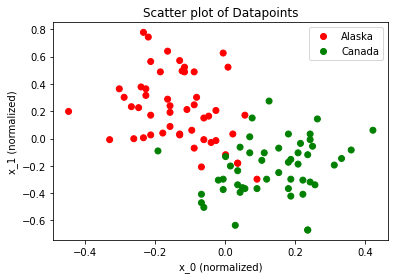

In [110]:
plot_data(X,Y_enc,save_file_name='plots/b_scatter.png')

[-2.77555756e-17  1.66533454e-16] 1.61310133060389


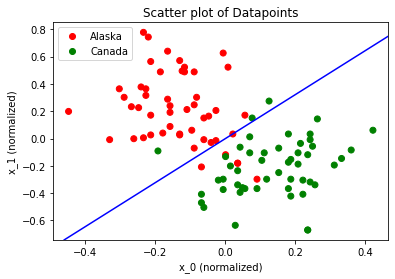

In [111]:
plot_boundary(X,Y_enc,m,save_file_name='plots/c_lin_boundary.png')

In [25]:
dcov = Si(X,Y_enc)

In [26]:
dcov

(array([[ 0.0121479 , -0.0087677 ],
        [-0.0087677 ,  0.06521665]]),
 array([[0.01520029, 0.00622316],
        [0.00622316, 0.04163824]]))

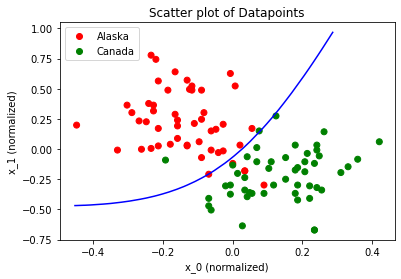

In [117]:
plot_quadratic_boundary(X,Y_enc,m,dcov,save_file_name='plots/e_quad_boundary.png')

In [57]:
print(m)

[[-0.13476234  0.21738531]
 [ 0.13476234 -0.21738531]]


In [61]:
m[0]@cov@m[0].T

0.002847664236842181